#Calcuration of Euler Mascheroni constant using
#Euler Maclaurin Summation Formula package for Maxima CAS

Written by Yasuaki dot Honda at gmail dot com

Copyright 2020 Yasuaki Honda

GPL2.0

Application to Euler Mascheroni constant is taken from the following PDF:

http://people.csail.mit.edu/kuat/courses/euler-maclaurin.pdf

In [1]:
:lisp (progn (ql:quickload :drakma) (ql:quickload :maxima-asdf))

To load "drakma":
  Load 1 ASDF system:
    drakma

; Loading "drakma"

To load "maxima-asdf":
  Load 1 ASDF system:
    maxima-asdf


(:MAXIMA-ASDF)


; Loading "maxima-asdf"



In [2]:
install_github("YasuakiHonda","euler-maclaurin-sum","master");

(%o2) [/Users/yasube/quicklisp/dists/quicklisp/archives/euler-maclaurin-sum-ma\
ster.gz, /Users/yasube/quicklisp/local-projects/YasuakiHonda-euler-maclaurin-s\
um-d65be7e/]

In [3]:
asdf_load_source("euler-maclaurin-sum");

(%o3)                         #<LOAD-SOURCE-OP >

In [4]:
ems;

       M
      ====
      \
(%o4)  >    f(n) = 
      /
      ====
      n = N
                                        !                  !
                               k        !         k        !
           k + 1              d         !        d         !
      (- 1)      bern(k + 1) (--- (f(x))!      - --- (f(x))!     )
K - 1                           k       !          k       !
====                          dx        !        dx        !
\                                       !x = M             !x = N
 >    ------------------------------------------------------------
/                               (k + 1)!
====
k = 1
               M
              /                            K
        K + 1 [                           d
   (- 1)      I  periodic_bernpoly(x, K) (--- (f(x))) dx
              ]                             K               M
              /                           dx               /
               N                                           [            f(N)
 

In [5]:
assume(M>1);
ems,f(x):=1/x,N:1,K:1;

(%o5)                               [M > 1]

       M         M                                        M
      ====      /                                        /
      \     1   [   d   1                                [  1       1    1
(%o6)  >    - = I  (-- (-)) periodic_bernpoly(x, 1) dx + I  - dx + --- + -
      /     n   ]   dx  x                                ]  x      2 M   2
      ====      /                                        /
      n = 1      1                                        1

In [6]:
%,nouns;

         M            M
        ====         /
        \     1      [  periodic_bernpoly(x, 1)                 1    1
(%o7)    >    - = (- I  ----------------------- dx) + log(M) + --- + -
        /     n      ]             2                           2 M   2
        ====         /            x
        n = 1         1

In [7]:
EuGamma:%-log(M);

         M                     M
        ====                  /
        \     1               [  periodic_bernpoly(x, 1)        1    1
(%o8)    >    - - log(M) = (- I  ----------------------- dx) + --- + -
        /     n               ]             2                  2 M   2
        ====                  /            x
        n = 1                  1

In [8]:
set_plot_option([svg_file, "maxplot.svg"])$

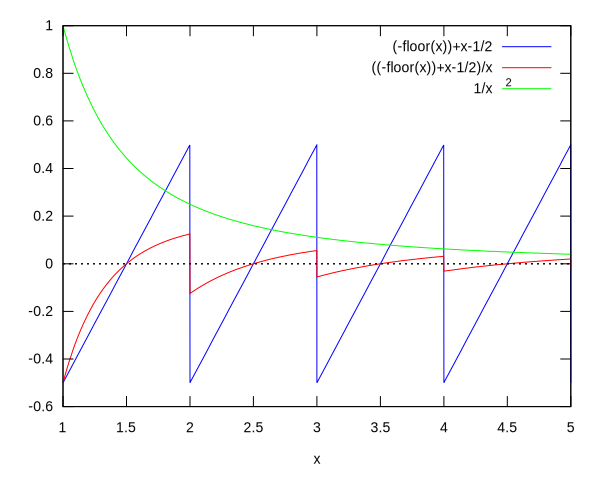

In [9]:
plot2d([bernpoly(x-floor(x),1),bernpoly(x-floor(x),1)/x^2,1/x^2],[x,1,5])$

In [10]:
apply1(first(rhs(EuGamma)), emsRemInt);

             M - 1
             ====
             \                               1        k      1
(%o11)     -  >    (log(k + 1) - log(k) + ------- + ----- - --- - 1)
             /                            2 k + 2   k + 1   2 k
             ====
             k = 1

In [11]:
rem:%,M:100,nouns,numer;

(%o12)                        0.0772073316515306

In [12]:
limit(rest(rhs(EuGamma)),M,inf)+rem,numer;

(%o13)                        0.5772073316515306

In [13]:
%gamma,numer;

(%o14)                        0.5772156649015329

In [14]:
ems,f(x):=1/x,N:10000,K:6,nouns;

Is M - 9999 positive, negative or zero?
pos;


        M                M
       ====             /
       \         1      [      periodic_bernpoly(x, 6)                 1
(%o15)  >        - = (- I      ----------------------- dx) + log(M) + ---
       /         n      ]                 7                           2 M
       ====             /                x
       n = 10000         10000
       1       1           3           6               3              120
   --------- - --   ---------------- - --   ----------------------- - ---
   100000000    2   5000000000000000    4   25000000000000000000000    6
               M                       M                              M
 + -------------- - --------------------- + -----------------------------
         12                  720                        30240
                  1
 - log(10000) + -----
                20000

In [15]:
EuGamma:%-log(M);

        M                         M
       ====                      /
       \         1               [      periodic_bernpoly(x, 6)        1
(%o16)  >        - - log(M) = (- I      ----------------------- dx) + ---
       /         n               ]                 7                  2 M
       ====                      /                x
       n = 10000                  10000
       1       1           3           6               3              120
   --------- - --   ---------------- - --   ----------------------- - ---
   100000000    2   5000000000000000    4   25000000000000000000000    6
               M                       M                              M
 + -------------- - --------------------- + -----------------------------
         12                  720                        30240
                  1
 - log(10000) + -----
                20000

In [16]:
diff(bernpoly(x,6),x),factor;

                                             2
(%o17)               (x - 1) x (2 x - 1) (3 x  - 3 x - 1)

In [17]:
[bernpoly(0,6),bernpoly(1/2,6),bernpoly(1,6)];

                                1      31   1
(%o18)                         [--, - ----, --]
                                42    1344  42

In [18]:
[err:integrate(%[1]/x^7,x,10000,inf),ev(err,numer)];

                           1
(%o19)       [---------------------------, 3.968253968253969e-27]
              252000000000000000000000000

In [19]:
fpprec:30;

(%o20)                                30

In [20]:
bfloat(sum(1/n,n,1,9999)+limit(rest(rhs(EuGamma)),M,inf));

(%o21)                5.77215664901532860606512090082b-1

In [21]:
bfloat(%gamma);

(%o22)                5.77215664901532860606512090082b-1